In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as stats

### Exercise 1 (Matrix normalization). 
Write a function that takes as input a matrix $M\in\mathbb R^{n\times d}$ and returns its normalized version with every column having average 0 and variance 1. Note that this operation does not perform any sort of decorellation.

In [2]:
def matrix_norm(M: np.ndarray) -> np.ndarray:
    """
    Normalize the columns of a matrix.

    Args:
        M (np.ndarray): Input matrix to be normalized.

    Returns:
        np.ndarray: Column-normalized matrix.
    """
    n, d = M.shape
    new_M = np.zeros((n, d))
    column_means = np.zeros(d)
    column_stds = np.zeros(d)

    # Compute column means
    for idx, col in enumerate(M.T):
        column_means[idx] = sum(col) / n

    # Compute column stds
    for idx, col in enumerate(M.T):
        for i in col:
            column_stds[idx] += (i - column_means[idx])**2
        column_stds[idx] = np.sqrt(column_stds[idx] / n)
    # Normalize columns
    for idx, col in enumerate(M.T):
        new_M[:, idx] = (col - column_means[idx]) / column_stds[idx]
    return new_M

import numpy as np
M = np.random.normal(size=(3,4))
M_norm = matrix_norm(M)
print("Original Matrix:\n", M)
print("Normalized Matrix:\n", M_norm)
print("Column means after normalization:\n", M_norm.mean(axis=0))
print("Column stds after normalization:\n", M_norm.std(axis=0))

Original Matrix:
 [[ 0.90237767 -0.68023994 -0.61297149 -0.89244998]
 [ 1.0884771   0.90029206 -0.79360535 -0.92608468]
 [-1.08333279 -1.44701476 -1.8551866   0.65336008]]
Normalized Matrix:
 [[ 0.61032043 -0.27755548  0.8654886  -0.6841578 ]
 [ 0.79966182  1.33970331  0.53586146 -0.72981012]
 [-1.40998225 -1.06214783 -1.40135006  1.41396792]]
Column means after normalization:
 [-7.40148683e-17  0.00000000e+00  7.40148683e-17  7.40148683e-17]
Column stds after normalization:
 [1. 1. 1. 1.]


In [3]:
def matrix_norm_np(M: np.ndarray) -> np.ndarray:
    """
    Normalize the columns of a matrix using NumPy functions.

    Args:
        M (np.ndarray): Input matrix to be normalized.

    Returns:
        np.ndarray: Column-normalized matrix.
    """
    col_means = M.mean(axis=0)
    col_stds = M.std(axis=0)
    M_norm = (M - col_means) / col_stds
    return M_norm


M = np.random.normal(size=(3,4))
M_norm = matrix_norm_np(M)
print("Original Matrix:\n", M)
print("Normalized Matrix:\n", M_norm)
print("Column means after normalization:\n", M_norm.mean(axis=0))
print("Column stds after normalization:\n", M_norm.std(axis=0))

Original Matrix:
 [[ 0.8714727   1.11920139  0.38407203  0.10101684]
 [ 0.43632593  1.18011264  1.14357895  0.89465908]
 [-0.85162199  0.87528764  0.13976153 -0.78440122]]
Normalized Matrix:
 [[ 0.98333588  0.46315293 -0.40178815  0.04460671]
 [ 0.38855244  0.92562577  1.37517033  1.20183213]
 [-1.37188832 -1.3887787  -0.97338218 -1.24643884]]
Column means after normalization:
 [ 0.00000000e+00 -2.96059473e-16 -1.48029737e-16  0.00000000e+00]
Column stds after normalization:
 [1. 1. 1. 1.]


In [4]:
def compare_functions(n, d):
    M = np.random.normal(size=(n, d))

    start_time = time.time()
    M_norm_loop = matrix_norm(M)
    loop_time = time.time() - start_time
    print(f"Loop-based normalization took {loop_time:.6f} seconds.")

    start_time = time.time()
    M_norm_np = matrix_norm_np(M)
    np_time = time.time() - start_time
    print(f"NumPy-based normalization took {np_time:.6f} seconds.")

    assert np.allclose(M_norm_loop, M_norm_np), "The two methods yield different results!"

compare_functions(3000, 3000)

Loop-based normalization took 1.976642 seconds.
NumPy-based normalization took 0.045851 seconds.


In [ ]:
X = np.random.normal(loc=0, scale=1, size=1000)

### Exercise 2 (Veryfying the Law Of Large Numbers and the Central Limit Theorem). 
We want to generate random numbers and check the Law of Large Numbers and Central Limit Theorem numerically.

1. Generate a large amount of i.i.d random numbers $\{X_i\}_{i=1}^n$ with the same mean $\mu$. Plot $\frac1n\sum_{i=1}^n X_i$ as a function of n and visualize its convergence to $\mu$. Do this for $X_i$ sampled from different distributions and see that it still works. In particular, try with the Student
distribution with one degree of freedom, a.k.a., the Cauchy distribution.

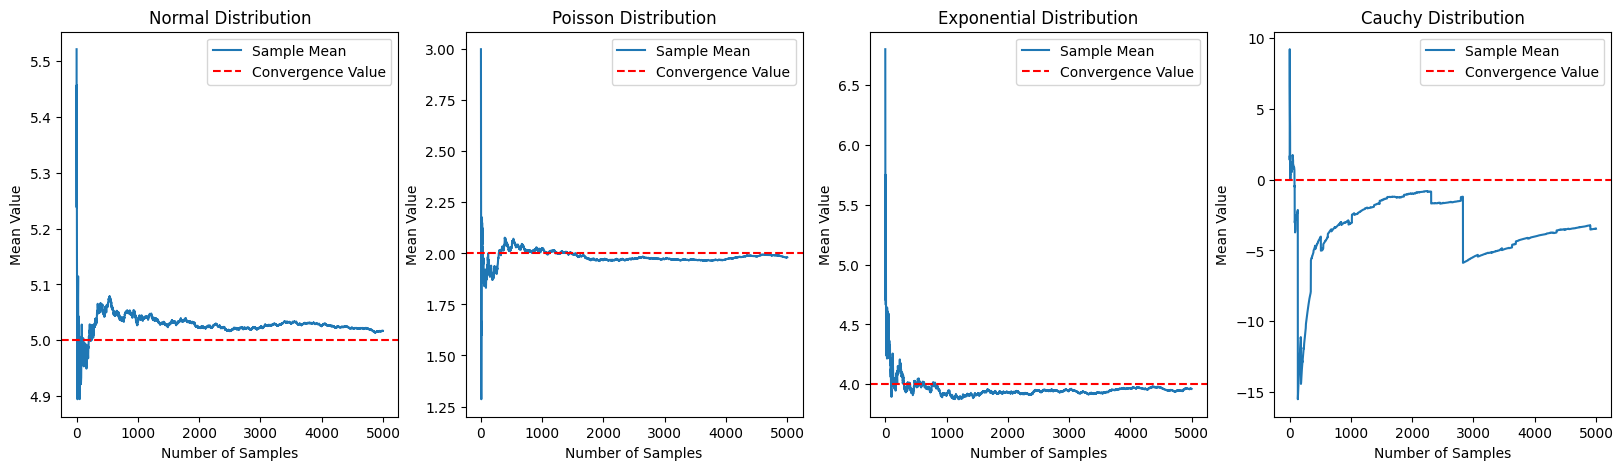

In [5]:
def plot_mean(data: np.ndarray, target_mean: float, ax: plt.Axes = None, title: str = ""):
    X_cumsum_mean = np.cumsum(data) / np.arange(1, len(data) + 1)
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(np.arange(len(X_cumsum_mean)), X_cumsum_mean, label='Sample Mean')
    ax.axhline(y=target_mean, color='r', linestyle='--', label='Convergence Value')
    ax.set_title(title)
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Mean Value')
    ax.legend()

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
n = 5000
X = np.random.normal(loc=5, scale=1, size=n)
plot_mean(X, target_mean=5, ax=axes[0], title="Normal Distribution")
X = np.random.poisson(lam=2, size=n)
plot_mean(X, target_mean=2, ax=axes[1], title="Poisson Distribution")
X = np.random.exponential(scale=4, size=n)
plot_mean(X, target_mean=4, ax=axes[2], title="Exponential Distribution")
X = np.random.standard_cauchy(size=n)
plot_mean(X, target_mean=0, ax=axes[3], title="Cauchy Distribution")

2. Generate a large amount of i.i.d random numbers $\{X_i\}_{i=1}^n$ with the same mean $\mu$ and variance $\sigma^2$. Visualize the distribution of the terms $Y_n := \frac{1}{\sqrt{n\sigma^2}}\sum_{i=1}^n (X_i-\mu)$ as a history of histograms (or qq-plots) and make clear that they converge to the Gaussian distribution $\mathcal N(0, 1)$ for large n. Repeat this experiment with random numbers stemming from different distributions. Try with the Student distribution with three degrees of freedom.

CLT with Normal Distribution:


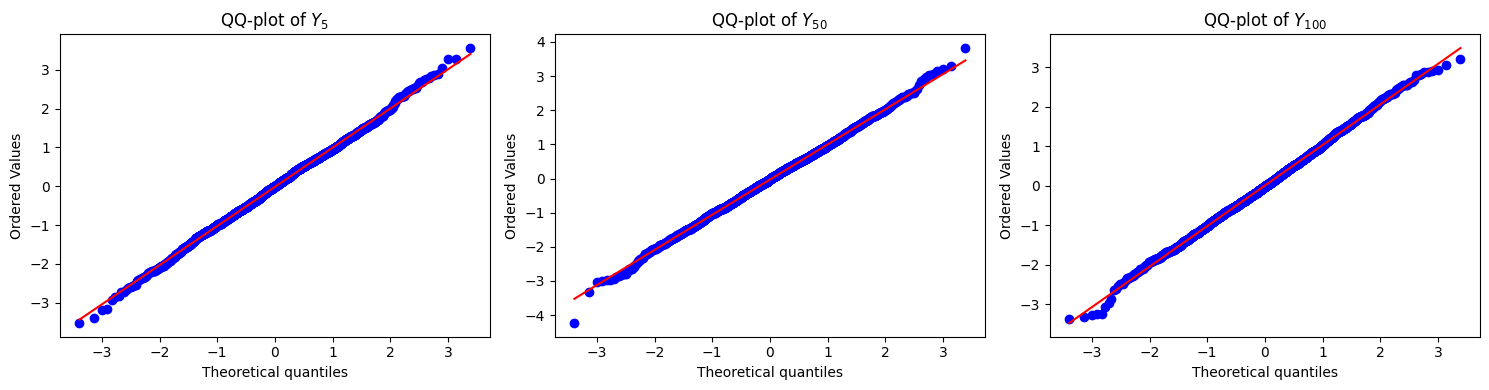

CLT with Poisson Distribution:


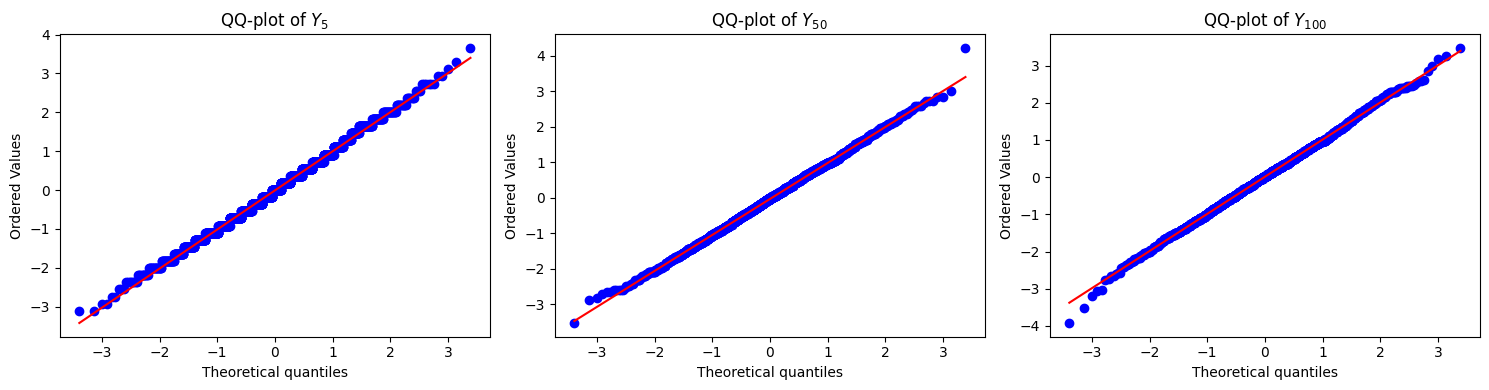

CLT with Exponential Distribution:


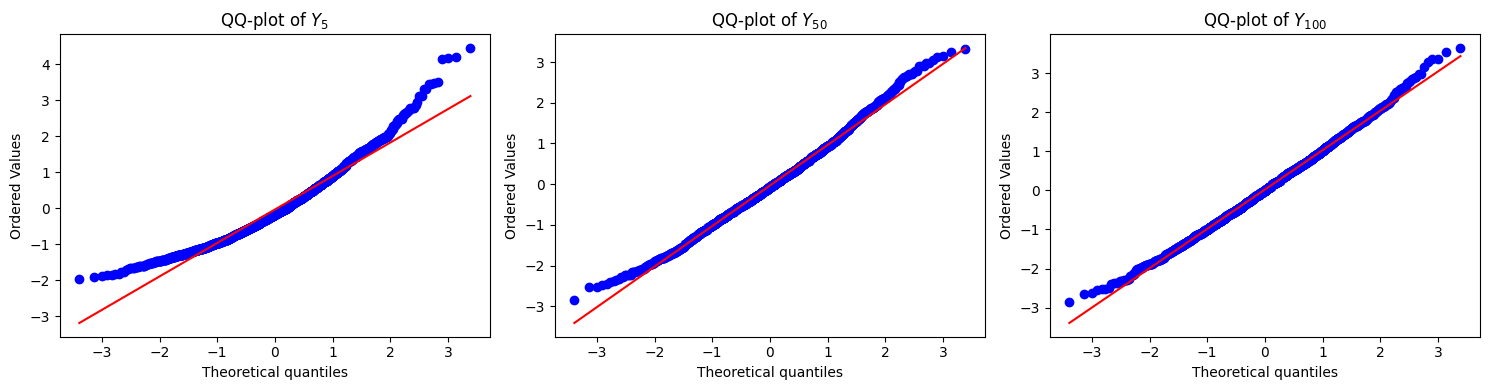

CLT with Student's 3-Distribution:


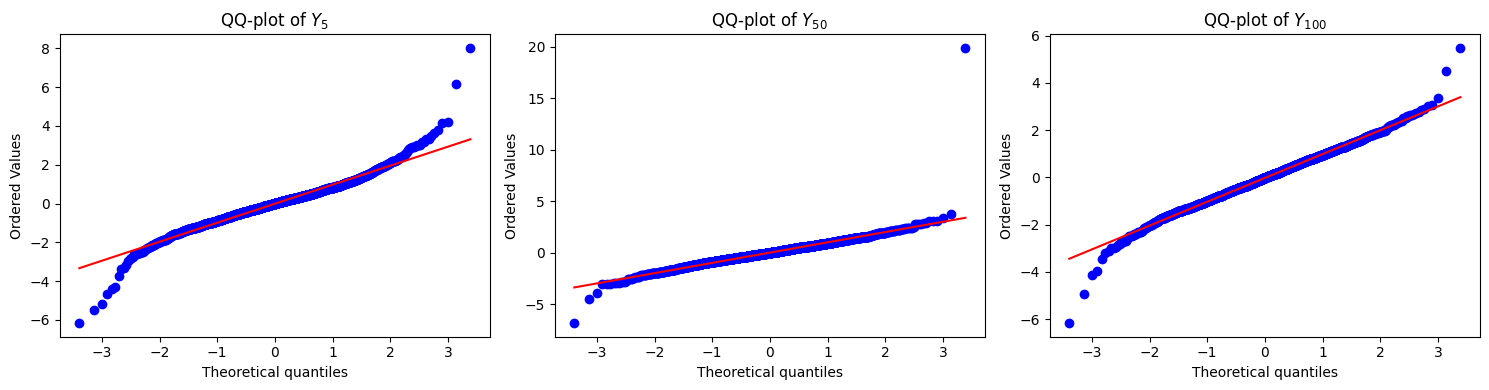

In [6]:
def plot_clt_norm(mu: float, sigma: float, dist: str, n_values: list = [5, 50, 100], num_samples: int = 2000, plot_type: str = 'qq'):
    """
    Plot the Central Limit Theorem (CLT) for different distributions.

    Args:
        mu (float): mu parameter of the distribution
        sigma (float): sigma parameter of the distribution
        dist (str): type of the distribution (e.g., 'normal', 'poisson', etc.)
        n_values (list, optional): list of sample sizes to consider. Defaults to [5, 50, 100].
        num_samples (int, optional): number of samples to draw. Defaults to 2000.
        plot_type (str, optional): type of plot to generate ('hist' for histogram, 'qq' for QQ-plot). Defaults to 'qq'.
    """
    fig, axes = plt.subplots(1, len(n_values), figsize=(5 * len(n_values), 4), sharey=(plot_type=='hist'))

    for ax, n in zip(axes, n_values):
        if dist == 'normal':
            X = np.random.normal(loc=mu, scale=sigma, size=(num_samples, n))
        elif dist == 'poisson':
            X = np.random.poisson(lam=mu, size=(num_samples, n))
        elif dist == 'exponential':
            X = np.random.exponential(scale=mu, size=(num_samples, n))
        elif dist == 'student':
            X = np.random.standard_t(df=3, size=(num_samples, n))
        else:
            raise ValueError("Unsupported distribution type.")

        Y_n = (X - mu).sum(axis=1) / (np.sqrt(n) * sigma)

        if plot_type == 'hist':
            ax.hist(Y_n, bins=50, density=True, alpha=0.6, color='g')
            x = np.linspace(-4, 4, 200)
            ax.plot(x, stats.norm.pdf(x), 'r--', lw=2, label="N(0,1)")
            ax.set_title(f'Histogram of $Y_{{{n}}}$')
            ax.set_xlabel('$Y_n$')
            ax.set_ylabel('Density')
            ax.legend()
        elif plot_type == 'qq':
            stats.probplot(Y_n, dist="norm", plot=ax)
            ax.set_title(f'QQ-plot of $Y_{{{n}}}$')
        else:
            raise ValueError("plot_type must be 'hist' or 'qq'")

    plt.tight_layout()
    plt.show()

print("CLT with Normal Distribution:")
plot_clt_norm(mu=3, sigma=1, dist='normal')

print("CLT with Poisson Distribution:")
plot_clt_norm(mu=6, sigma=np.sqrt(6), dist='poisson')

print("CLT with Exponential Distribution:")
plot_clt_norm(mu=4, sigma=4, dist='exponential')

print("CLT with Student's 3-Distribution:")
plot_clt_norm(mu=0, sigma=np.sqrt(3/(3-2)), dist='student')

3. Same exercise as above, but where $\sigma$ is estimated from the sample; can you use the normalizing matrix function from exercise 1 for this? Try with the Student distribution with two and three degrees of freedom.

CLT with Normal Distribution:


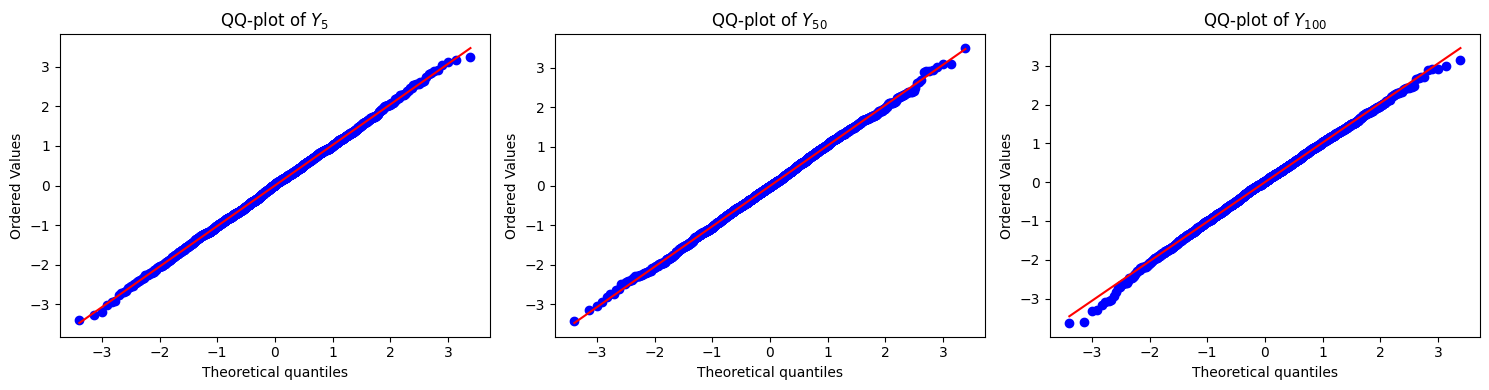

CLT with Poisson Distribution:


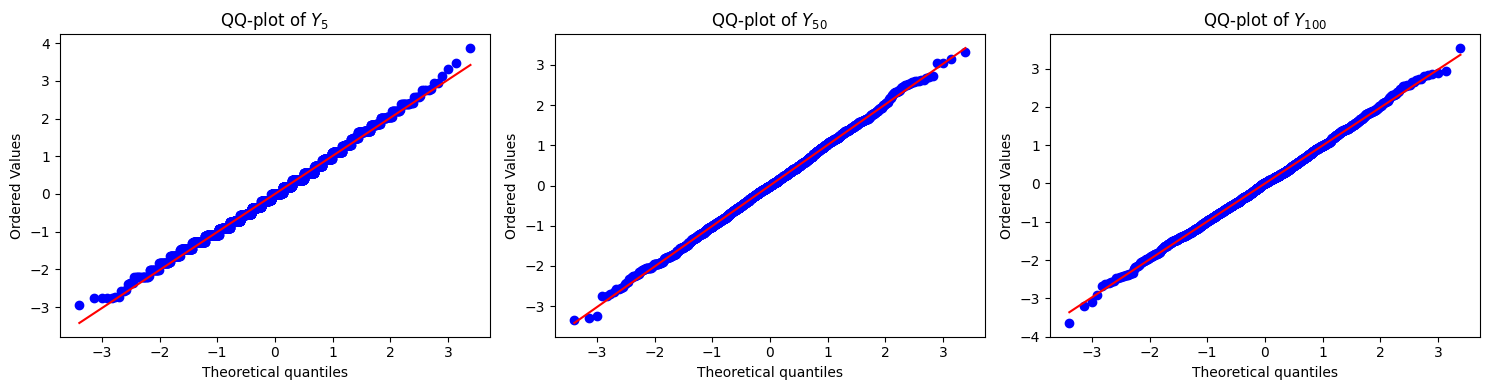

CLT with Exponential Distribution:


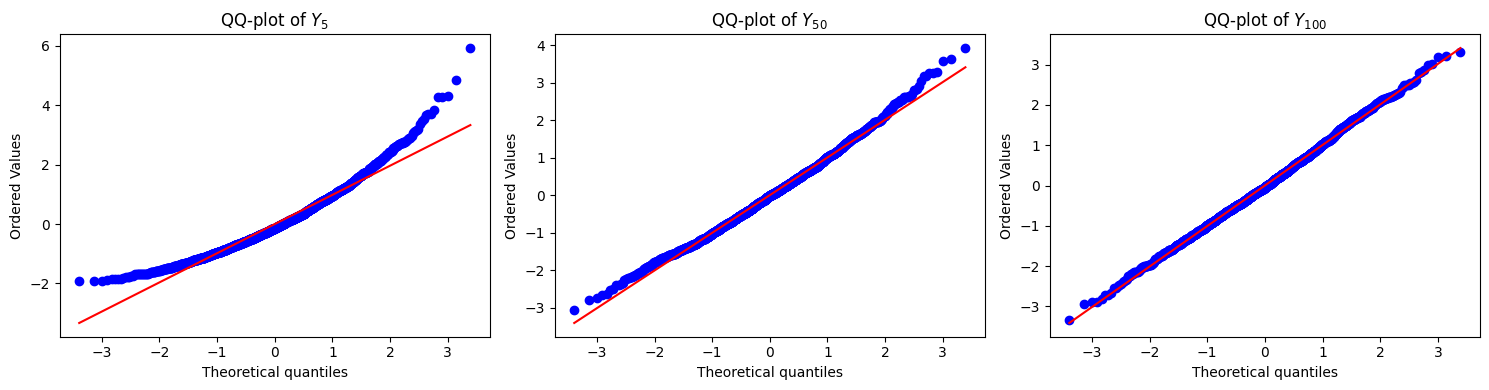

CLT with Student's 2-Distribution:


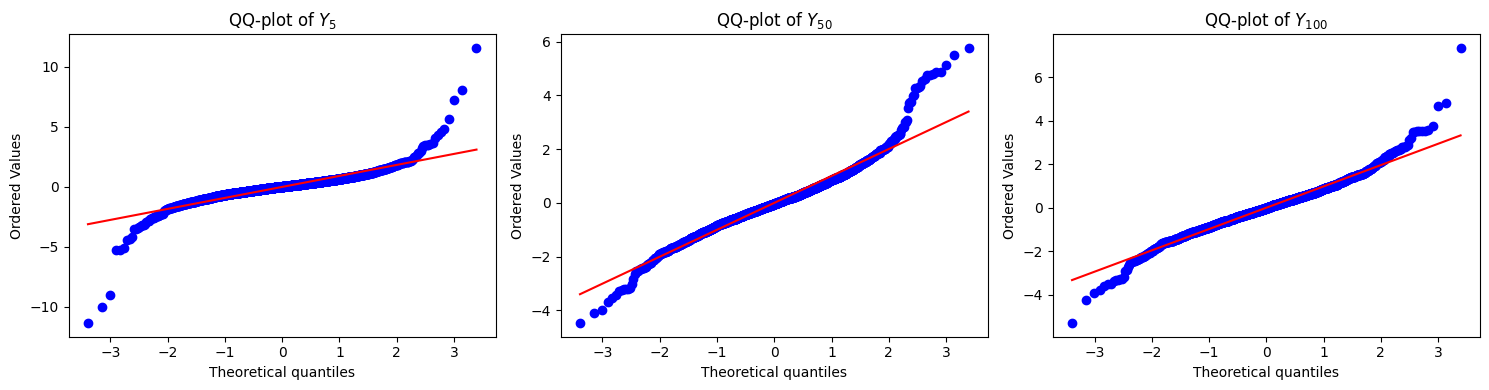

CLT with Student's 3-Distribution:


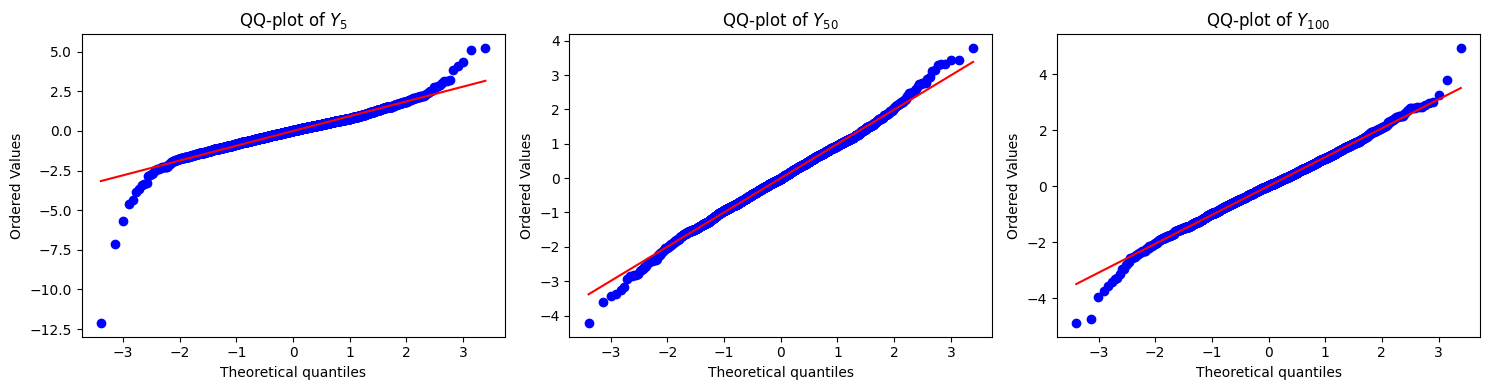

In [8]:
# Exercise 2.3: CLT with estimated sigma (sample std)
def plot_clt_sample_sigma(mu: float, dist: str, n_values: list = [5, 50, 100], num_samples: int = 2000, plot_type: str = 'qq', df: int = 3):
    fig, axes = plt.subplots(1, len(n_values), figsize=(5 * len(n_values), 4), sharey=(plot_type=='hist'))

    sigma = 4
    for ax, n in zip(axes, n_values):
        if dist == 'normal':
            X = np.random.normal(loc=mu, scale=sigma, size=(num_samples, n))
        elif dist == 'poisson':
            X = np.random.poisson(lam=mu, size=(num_samples, n))
        elif dist == 'exponential':
            X = np.random.exponential(scale=mu, size=(num_samples, n))
        elif dist == 'student':
            if df < 2:
                raise ValueError("Degrees of freedom must be greater than 2 for finite variance.")
            X = np.random.standard_t(df=df, size=(num_samples, n))
        else:
            raise ValueError("Unsupported distribution type.")

        X_norm = matrix_norm_np(X)
        Y_n = X_norm.sum(axis=1) / np.sqrt(n)

        if plot_type == 'hist':
            ax.hist(Y_n, bins=50, density=True, alpha=0.6, color='g')
            x = np.linspace(-4, 4, 200)
            ax.plot(x, stats.norm.pdf(x), 'r--', lw=2, label="N(0,1)")
            ax.set_title(f'Histogram of $Y_{{{n}}}$')
            ax.set_xlabel('$Y_n$')
            ax.set_ylabel('Density')
            ax.legend()
        elif plot_type == 'qq':
            stats.probplot(Y_n, dist="norm", plot=ax)
            ax.set_title(f'QQ-plot of $Y_{{{n}}}$')
        else:
            raise ValueError("plot_type must be 'hist' or 'qq'")

    plt.tight_layout()
    plt.show()


print("CLT with Normal Distribution:")
plot_clt_sample_sigma(mu=3, dist='normal')

print("CLT with Poisson Distribution:")
plot_clt_sample_sigma(mu=6, dist='poisson')

print("CLT with Exponential Distribution:")
plot_clt_sample_sigma(mu=4, dist='exponential')

print("CLT with Student's 2-Distribution:")
plot_clt_sample_sigma(mu=0, dist='student', df=2)

print("CLT with Student's 3-Distribution:")
plot_clt_sample_sigma(mu=0, dist='student', df=3)
